In [17]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.metrics import f1_score, classification_report
import datetime

In [2]:
column_name = ['Category', 'Description']

filepath = 'dataset/ecommerceDataset.csv'
df = pd.read_csv(filepath,header=None,names=column_name)

In [3]:
df.head()

,Category,Description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Category     50425 non-null  object
 1   Description  50424 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


In [5]:
df.describe()

,Category,Description
count,50425,50424
unique,4,27802
top,Household,Think & Grow Rich About the Author NAPOLEON HI...
freq,19313,30


In [6]:
df.duplicated().sum()

22622

In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50424 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Category     50424 non-null  object
 1   Description  50424 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [9]:
feature = df['Description'].values
label = df['Category'].values

#(B) Perform label encoding to the category column
label_encoder = LabelEncoder()
label_encoded = label_encoder.fit_transform(label)
label_encoded[:5]

array([3, 3, 3, 3, 3])

In [10]:
sample_categories = label_encoder.inverse_transform([0,1,0,1,0])
print(sample_categories)

['Books' 'Clothing & Accessories' 'Books' 'Clothing & Accessories' 'Books']


In [11]:
seed= 42
x_train,x_split,y_train,y_split = train_test_split(feature,label_encoded,train_size=0.7,random_state=seed)
x_val,x_test,y_val,y_test = train_test_split(x_split,y_split,train_size = 0.5, random_state=seed)

In [12]:
from tensorflow import keras
tokenizer = keras.layers.TextVectorization(max_tokens=5000, output_sequence_length=200) #train layer
tokenizer.adapt(x_train)

In [13]:
embedding = keras.layers.Embedding(5000,64)

In [14]:

model = keras.Sequential()
# (A) NLP Layers
model.add(tokenizer)
model.add(embedding)
# (B) RNN 
model.add(keras.layers.Bidirectional(keras.layers.LSTM(32,return_sequences=False)))
model.add(keras.layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ ?                      │   0 (unbuilt) │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], F1Score=())

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
logpath = "tensorboard/nlp_tutorial/" + datetime.datetime.now().strftime("%Y-%m-%d_%H%M%S")
tb = keras.callbacks.TensorBoard(logpath)
es= keras.callbacks.EarlyStopping(patience=2,verbose=3)
history = model.fit(x_train,y_train,validation_data=(x_val,y_val), epochs=6,batch_size=32, callbacks=[tb,es])

Epoch 1/6
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 33s 27ms/step - accuracy: 0.7953 - loss: 0.5615 - val_accuracy: 0.9631 - val_loss: 0.1410
Epoch 2/6
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 29s 26ms/step - accuracy: 0.9697 - loss: 0.1095 - val_accuracy: 0.9710 - val_loss: 0.1130
Epoch 3/6
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 29s 27ms/step - accuracy: 0.9820 - loss: 0.0688 - val_accuracy: 0.9713 - val_loss: 0.1098
Epoch 4/6
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 31s 28ms/step - accuracy: 0.9893 - loss: 0.0416 - val_accuracy: 0.9718 - val_loss: 0.1080
Epoch 5/6
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 29s 27ms/step - accuracy: 0.9899 - loss: 0.0359 - val_accuracy: 0.9730 - val_loss: 0.1169
Epoch 6/6
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 30s 27ms/step - accuracy: 0.9929 - loss: 0.0274 - val_accuracy: 0.9714 - val_loss: 0.1243
Epoch 6: early stopping


In [43]:
evaluation = model.evaluate(x_test,y_test)
print(evaluation)

237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9740 - loss: 0.1108
[0.139706552028656, 0.9702538251876831]


In [21]:
prediction = model.predict(x_test)
prediction_index= np.argmax(prediction, axis=1)

model_report = classification_report(y_test,prediction_index)
print(model_report)

237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1756
           1       0.99      0.97      0.98      1312
           2       0.95      0.97      0.96      1560
           3       0.97      0.97      0.97      2936

    accuracy                           0.97      7564
   macro avg       0.97      0.97      0.97      7564
weighted avg       0.97      0.97      0.97      7564



In [30]:
predictions = model.predict(x_test[:1])
class_prediction = label_encoder.inverse_transform(np.argmax(predictions,axis=1))
print(x_test[1500:1501])
print(class_prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
['HomeTown Utsav Four-Door Wardrobe with Mirror (Wenge)']
['Books']


In [38]:
keras.models.save_model(model,'Ecommerce_classifier_model.h5')


In [39]:
import pickle
with open('tokenizer.json', 'wb') as f:
    pickle.dump(tokenizer, f)

print("Model and tokenizer saved for deployment.")

Model and tokenizer saved for deployment.


In [40]:
with open("label_encoder.json", "wb") as f:
    pickle.dump(label_encoder, f)
    

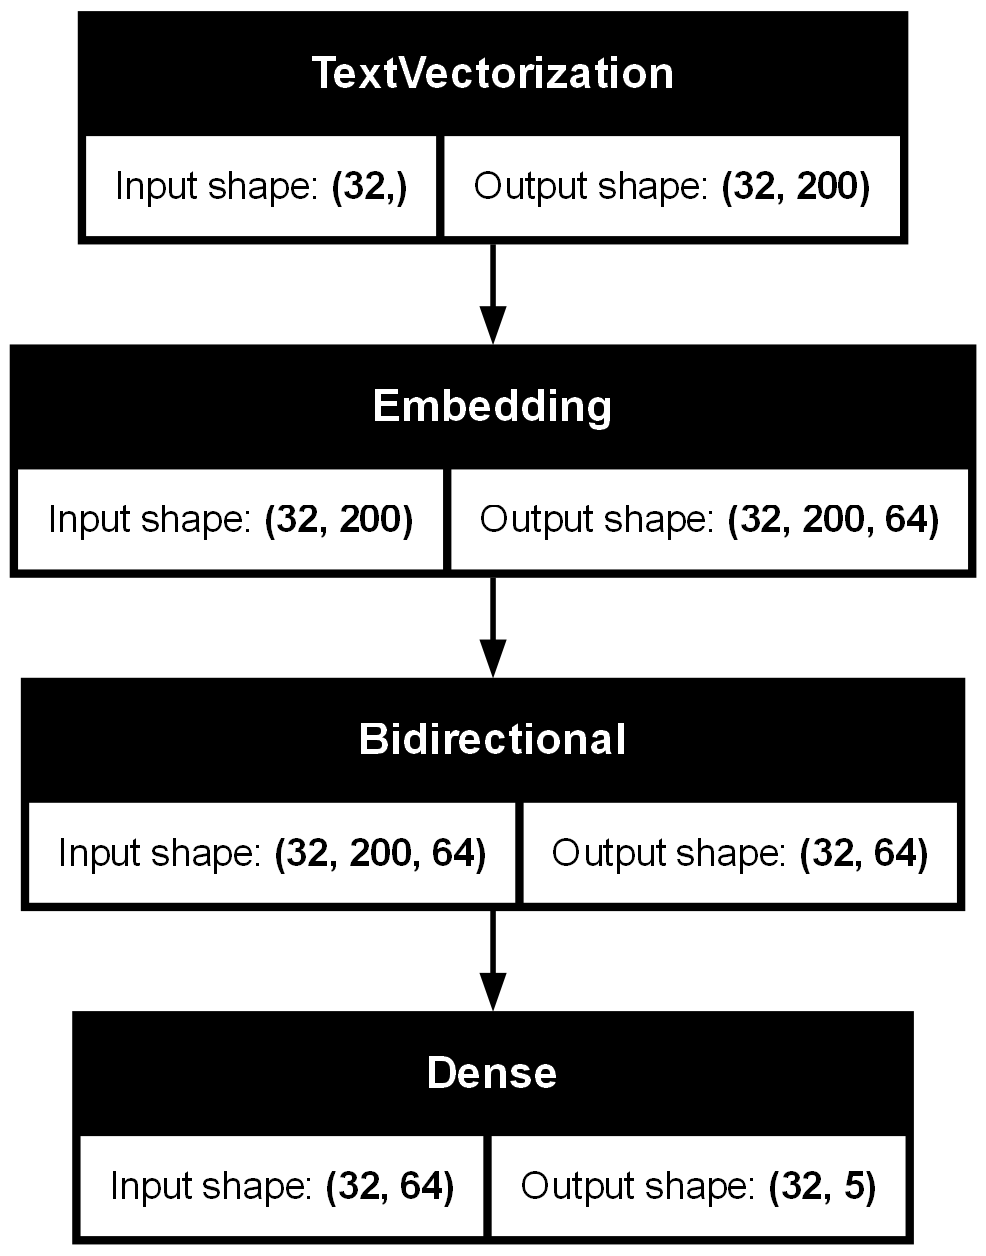

In [44]:
keras.utils.plot_model(model,show_shapes=True)